# AFL 3 - Data Mining - Pak Gunawan
Nama: Angellie Ennovaryn M<br>
NIM: 0706022110042

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, recall_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.naive_bayes import GaussianNB

## Load Data 

In [53]:
df = pd.read_csv("C:/Users/Asuspc/OneDrive/Documents/Data Mining 2023_2024/AFL-3/wine-quality-white-and-red.csv", sep=',')

df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


### **Data Preparation/Cleaning**

In [54]:
# Check of missing values
df.isna().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Tidak ada missing value, maka lanjut ke step berikutnya

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [56]:
# Categorical variables

# Categorical feature that needs to be encoded into numerical format

type = (df.dtypes == 'object')
object_value = list(type[type].index)
print(f'Categorical feature in the Dataset:-{object_value}')

Categorical feature in the Dataset:-['type']


In [57]:
# I choose column Target that need to be encoded

label_encoder = LabelEncoder()

# Encoding label for Column Target
df['type'] = label_encoder.fit_transform(df['type'])

df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,1,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,0,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,0,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
6494,0,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,0,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [58]:
# Check of duplicate data

duplicatecheck = df.duplicated().sum()
print("The total of the duplicate data is", duplicatecheck)

duplicatedata = df[df.duplicated()]
print("\nThe duplicate data is:")
duplicatedata

The total of the duplicate data is 1177

The duplicate data is:


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
5,1,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
7,1,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
8,1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
20,1,6.2,0.660,0.48,1.2,0.029,29.0,75.0,0.98920,3.33,0.39,12.8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6461,0,7.2,0.695,0.13,2.0,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
6462,0,7.2,0.695,0.13,2.0,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
6465,0,7.2,0.695,0.13,2.0,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
6479,0,6.2,0.560,0.09,1.7,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5


In [59]:
# Drop duplicate data

df = df.drop_duplicates()

duplicatecheck = df.duplicated().sum()
print("The total of the duplicate data is", duplicatecheck)

The total of the duplicate data is 0


### **Decision Tree**

##### **1. Boosting**

Gini Tree

Akurasi Model (Boosting): 0.3524


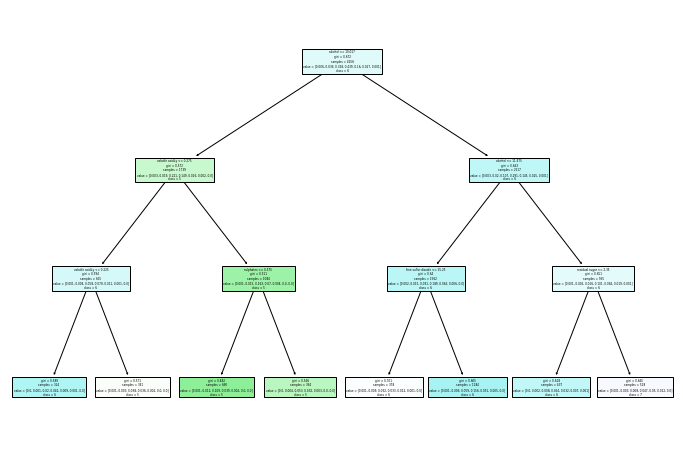

In [62]:
# Mengimpor pustaka-pustaka yang diperlukan
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
import matplotlib.pyplot as plt

# Diasumsikan df adalah DataFrame yang berisi data kualitas anggur

# Menentukan fitur (X) dan target (y)
X = df.drop('quality', axis=1)  # Menghapus kolom 'quality' sebagai target
y = df['quality']

# Membagi dataset menjadi data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membuat base classifier (pohon keputusan)
base_classifier = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)

# Membuat model AdaBoost
adaboost_model = AdaBoostClassifier(base_classifier, n_estimators=50, random_state=42)

# Melatih model
adaboost_model.fit(X_train, y_train)

# Memprediksi data uji
y_pred = adaboost_model.predict(X_test)

# Mengukur akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi Model (Boosting): {accuracy:.4f}")

# Visualisasikan salah satu base classifier dalam ensemble (yang pertama)
plt.figure(figsize=(12, 8))
tree.plot_tree(adaboost_model.estimators_[0], feature_names=X.columns, class_names=[str(c) for c in adaboost_model.classes_], filled=True)
plt.show()

Entropy Tree

Accuracy Score (Boosting): 0.3994


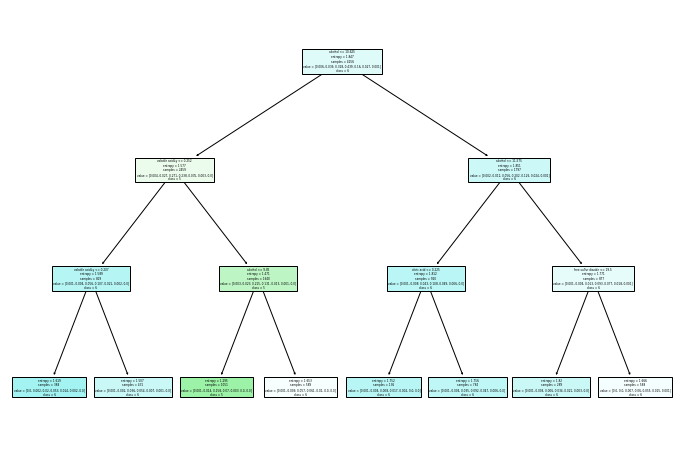

In [63]:
# Membuat base classifier (pohon keputusan)
base_classifier = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

# Membuat model AdaBoost
adaboost_model = AdaBoostClassifier(base_classifier, n_estimators=50, random_state=42)

# Melatih model
adaboost_model.fit(X_train, y_train)

# Memprediksi data uji
y_pred = adaboost_model.predict(X_test)

# Mengukur akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score (Boosting): {accuracy:.4f}")

# Visualize one of the base classifiers in the ensemble (the first one)
plt.figure(figsize=(12, 8))
tree.plot_tree(adaboost_model.estimators_[0], feature_names=X.columns, class_names=[str(c) for c in adaboost_model.classes_], filled=True)
plt.show()

##### **2. Bagging**

Gini Tree

Akurasi Model (Bagging): 0.5329


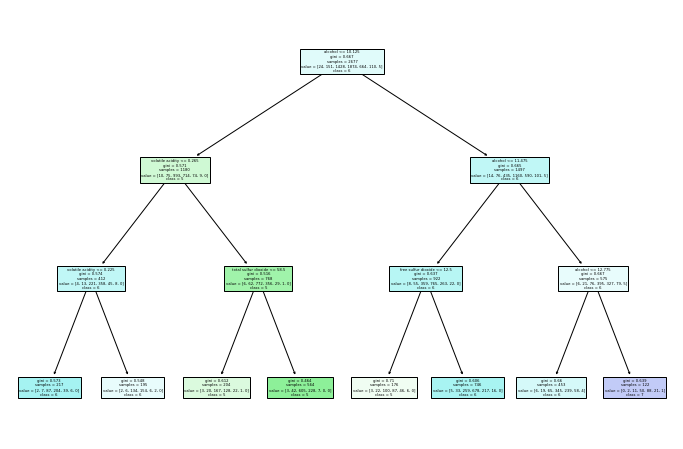

In [64]:
from sklearn.ensemble import BaggingClassifier

# Membuat base classifier (pohon keputusan)
base_classifier = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)

# Membuat model Bagging
bagging_model = BaggingClassifier(base_classifier, n_estimators=50, random_state=42)

# Melatih model
bagging_model.fit(X_train, y_train)

# Memprediksi data uji
y_pred = bagging_model.predict(X_test)

# Mengukur akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi Model (Bagging): {accuracy:.4f}")

# Visualisasikan salah satu base classifier dalam ensemble (yang pertama)
plt.figure(figsize=(12, 8))
tree.plot_tree(bagging_model.estimators_[0], feature_names=X.columns, class_names=[str(c) for c in bagging_model.classes_], filled=True)
plt.show()

Entropy Tree

Akurasi Model (Bagging): 0.5216


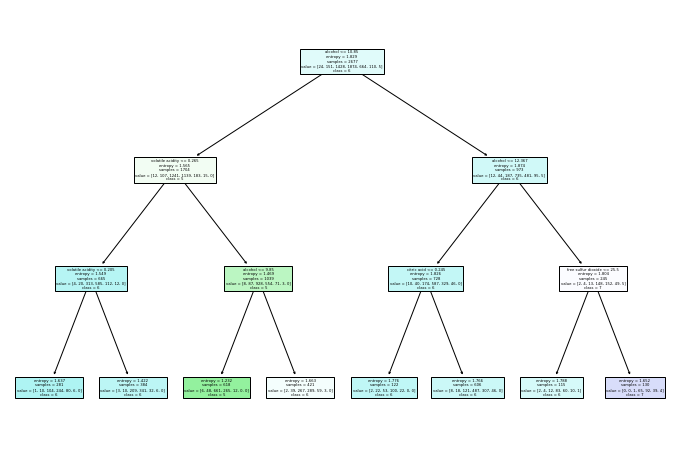

In [69]:
from sklearn.ensemble import BaggingClassifier

# Membuat base classifier (pohon keputusan)
base_classifier = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

# Membuat model Bagging
bagging_model = BaggingClassifier(base_classifier, n_estimators=50, random_state=42)

# Melatih model
bagging_model.fit(X_train, y_train)

# Memprediksi data uji
y_pred = bagging_model.predict(X_test)

# Mengukur akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi Model (Bagging): {accuracy:.4f}")

# Visualisasikan salah satu base classifier dalam ensemble (yang pertama)
plt.figure(figsize=(12, 8))
tree.plot_tree(bagging_model.estimators_[0], feature_names=X.columns, class_names=[str(c) for c in bagging_model.classes_], filled=True)
plt.show()

##### **3. Random Forest**

In [71]:
# Inisialisasi model Random Forest
random_forest_model = RandomForestClassifier(n_estimators=50, random_state=42)

# Melatih model
random_forest_model.fit(X_train, y_train)

# Memprediksi data uji
y_pred = random_forest_model.predict(X_test)

# Mengukur akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score (Random Forest): {accuracy:.4f}")

Accuracy Score (Random Forest): 0.5733


##### **4. Regression Tree**

In [32]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Inisialisasi model Decision Tree Regressor
regression_tree_model = DecisionTreeRegressor(random_state=42)

# Melatih model
regression_tree_model.fit(X_train, y_train)

# Memprediksi data uji
y_pred = regression_tree_model.predict(X_test)

# Mengukur performa dengan Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (Regression Tree): {mse:.4f}")

Mean Squared Error (Regression Tree): 0.9380


### **Clustering**

##### **1. K-Means**

In [33]:
# Normalisasi data
scaler = StandardScaler()
kmeansclus_df = scaler.fit_transform(df)

kmeans_params = { "init": "random", "n_init": 10,"max_iter": 300,
                 "random_state": 42}

# check the inertia for each K
WCSS = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_params)
    kmeans.fit(kmeansclus_df)
    WCSS.append(kmeans.inertia_)


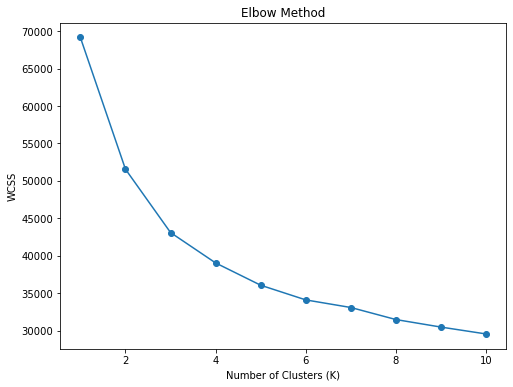

In [34]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), WCSS, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.show()

In [35]:
# Mencari nilai 'k'
from kneed import KneeLocator

findknee = KneeLocator(range(1, 11), WCSS, curve="convex", direction="decreasing")
print('The best k for your model is ', findknee.elbow)

The best k for your model is  3


In [36]:
# Mencari K-Means
kmeans = KMeans(n_init=3 , n_clusters=4, max_iter=300, random_state=42)

ykmeans= kmeans.fit_predict(kmeansclus_df)
df['K-Means']= ykmeans

df

C:\Users\Asuspc\AppData\Local\Temp\ipykernel_12228\3105054767.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['K-Means']= ykmeans


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,K-Means
0,1,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,1
1,1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,0
2,1,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,0
3,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,1
6,1,6.2,0.320,0.16,7.0,0.045,30.0,136.0,0.99490,3.18,0.47,9.6,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6491,0,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,3
6492,0,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,3
6493,0,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,3
6495,0,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,3


### **Association Rule Meaning**

##### **APRIORI**

In [37]:
# load the data set and show the first five transaction
url = "https://gist.githubusercontent.com/Harsh-Git-Hub/2979ec48043928ad9033d8469928e751/raw/72de943e040b8bd0d087624b154d41b2ba9d9b60/retail_dataset.csv"
df1 = pd.read_csv(url)

df1.head()

,0,1,2,3,4,5,6
0,Bread,Wine,Eggs,Meat,Cheese,Pencil,Diaper
1,Bread,Cheese,Meat,Diaper,Wine,Milk,Pencil
2,Cheese,Meat,Eggs,Milk,Wine,NaN,NaN
3,Cheese,Meat,Eggs,Milk,Wine,NaN,NaN
4,Meat,Pencil,Wine,NaN,NaN,NaN,NaN


In [38]:
unique_product = (df1['6'].unique())

print(set(unique_product))

{nan, 'Meat', 'Milk', 'Eggs', 'Bread', 'Diaper', 'Bagel', 'Cheese', 'Wine', 'Pencil'}


In [39]:
#create an itemset based on the products
itemset = set(unique_product)

# encoding the feature
encode_feature = []
for index, row in df1.iterrows(): 
    label = {}
    uncommons = list(set(unique_product) - set(row))
    commons = list(set(unique_product).intersection(row))
    for ucom in uncommons:
        label[ucom] = 0
    for com in commons:
        label[com] = 1
    encode_feature.append(label)

# create new dataframe from the encoded features
encode_df1 = pd.DataFrame(encode_feature)

# show the new dataframe
encode_df1.head()

,NaN,Milk,Bagel,Meat,Eggs,Bread,Diaper,Cheese,Wine,Pencil
0,0,0,0,1,1,1,1,1,1,1
1,0,1,0,1,0,1,1,1,1,1
2,1,1,0,1,1,0,0,1,1,0
3,1,1,0,1,1,0,0,1,1,0
4,1,0,0,1,0,0,0,0,1,1


Since, the encoded dataframe consist of the empty column. We will drop the NaN column or select all columns other than the first column.

In [40]:
new_encode_df1 = (encode_df1.loc[:, encode_df1.columns.notna()])

new_encode_df1.head()

,Milk,Bagel,Meat,Eggs,Bread,Diaper,Cheese,Wine,Pencil
0,0,0,1,1,1,1,1,1,1
1,1,0,1,0,1,1,1,1,1
2,1,0,1,1,0,0,1,1,0
3,1,0,1,1,0,0,1,1,0
4,0,0,1,0,0,0,0,1,1


In [41]:
from mlxtend.frequent_patterns import apriori, association_rules

frequently_purchased_products = apriori(new_encode_df1, min_support=0.2, use_colnames=True)

frequently_purchased_products

c:\Users\Asuspc\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.501587,(Milk)
1,0.425397,(Bagel)
2,0.476190,(Meat)
3,0.438095,(Eggs)
4,0.504762,(Bread)
5,0.406349,(Diaper)
6,0.501587,(Cheese)
7,0.438095,(Wine)
8,0.361905,(Pencil)
9,0.225397,"(Milk, Bagel)"


In [42]:
ass_rule_itemset = association_rules(frequently_purchased_products, metric="confidence", min_threshold=0.6)

ass_rule_itemset

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Milk),(Cheese),0.501587,0.501587,0.304762,0.607595,1.211344,0.053172,1.270148,0.350053
1,(Cheese),(Milk),0.501587,0.501587,0.304762,0.607595,1.211344,0.053172,1.270148,0.350053
2,(Bagel),(Bread),0.425397,0.504762,0.279365,0.656716,1.301042,0.064641,1.442650,0.402687
3,(Eggs),(Meat),0.438095,0.476190,0.266667,0.608696,1.278261,0.058050,1.338624,0.387409
4,(Meat),(Cheese),0.476190,0.501587,0.323810,0.680000,1.355696,0.084958,1.557540,0.500891
5,(Cheese),(Meat),0.501587,0.476190,0.323810,0.645570,1.355696,0.084958,1.477891,0.526414
6,(Eggs),(Cheese),0.438095,0.501587,0.298413,0.681159,1.358008,0.078670,1.563203,0.469167
7,(Wine),(Cheese),0.438095,0.501587,0.269841,0.615942,1.227986,0.050098,1.297754,0.330409
8,"(Milk, Meat)",(Cheese),0.244444,0.501587,0.203175,0.831169,1.657077,0.080564,2.952137,0.524816
9,"(Meat, Cheese)",(Milk),0.323810,0.501587,0.203175,0.627451,1.250931,0.040756,1.337845,0.296655
